# Exploratory Data Analysis

In [1]:
#load the standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats



Bad key "text.kerning_factor" on line 4 in
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#load the dataset
df1=pd.read_csv("./Stats.csv")
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_new,number_of_reviews_new,reviews_per_month_new,calculated_host_listings_count_new,availability_365_new
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,9.0,0.21,5.0,365.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,45.0,0.38,2.0,355.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,150.0,0.0,0.00,1.0,365.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,70.0,3.00,1.0,194.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,80.0,9.0,0.10,1.0,0.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   neighbourhood_group                 48895 non-null  object 
 1   neighbourhood                       48895 non-null  object 
 2   latitude                            48895 non-null  float64
 3   longitude                           48895 non-null  float64
 4   room_type                           48895 non-null  object 
 5   price                               48895 non-null  int64  
 6   minimum_nights                      48895 non-null  int64  
 7   number_of_reviews                   48895 non-null  int64  
 8   last_review                         48895 non-null  object 
 9   reviews_per_month                   48895 non-null  float64
 10  calculated_host_listings_count      48895 non-null  int64  
 11  availability_365                    48895

# Hypothesis Testing

# ttest for mean of prices (Manhattan and Brooklyn)

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [4]:
#H0 : the null hypothesis in this dataset where, mean(Manhattan) = mean(Brooklyn) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Manhattan) != mean(Brooklyn) significantly different.

In [5]:
price_M=df1[df1["neighbourhood_group"]=='Manhattan']['price_new']
price_B=df1[df1["neighbourhood_group"]=='Brooklyn']['price_new']

In [6]:
#Apply the Welch’s t-test, equal_var=False
ttest_price_M_B=stats.ttest_ind(price_M,price_B,equal_var=False)

In [7]:
ttest_price_M_B

Ttest_indResult(statistic=67.45696745452888, pvalue=0.0)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above test our p_value is Zero less than the significance value 5%, then reject null hypothesis(H0). The ttest indicates that our mean price of Manhattan and Brooklyn are different.

# ztest for mean of prices (Queens and Staten Island)

In [8]:
#load the ztest standard library
from statsmodels.stats.weightstats import ztest

In [9]:
#H0 : the null hypothesis in this dataset where, mean(Queens) = mean(Staten Island) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Queens) != mean(Staten Island) significantly different.

In [10]:
price_Q=df1[df1["neighbourhood_group"]=='Queens']['price_new']
price_S=df1[df1["neighbourhood_group"]=='Staten Island']['price_new']

In [11]:
ztest(price_Q,price_S)

(-0.2598037948249568, 0.7950151236018372)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above ztest our p_value=0.79 more than the significance value 5%, then accept null hypothesis(H0). The ztest indicates that our mean price of Queens and Staten Island are not statistically significantly different from each other.

# ztest for mean of prices (Private room and Shared room)

In [12]:
#H0 : the null hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly different.

In [13]:
price_P=df1[df1["room_type"]=='Private room']['price_new']
price_S=df1[df1["room_type"]=='Shared room']['price_new']

In [14]:
ztest(price_P,price_S)

(13.327567619847347, 1.6003072579067338e-40)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above ztest our p_value=0 less than the significance value 5%, then reject null hypothesis(H0). The ztest indicates that our mean price of Private and Shared room are significantly different.

### Is there a significant correlation between number of reviews and price of the listing?

In [15]:
#H0 : the null hypothesis in this dataset where, number of reviews and prices are correlated significantly similar.
#H1 : the alternative hypothesis in this dataset where, number of reviews and prices are not correlated significantly different.

In [16]:
stats.pearsonr(df1['number_of_reviews_new'],df1['price_new'])

(-0.05839349845692179, 3.3476879756431823e-38)

There is negative correlation between number of reviews and price, Pearson(r) value = -0.05. Hence we reject the null hypothesis because our p_value lies less than the significance value 5%. Therefore number of reviews and prices are significantly different.  

### Is there a significant correlation between availability and price of the listing?

In [17]:
#H0 : the null hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly different.

In [18]:
stats.pearsonr(df1['availability_365_new'],df1['price_new'])

(0.1037865943143957, 3.6099096668652315e-117)

We conclude i.e there is positive correlation between availability and price, perasonr value = 0.10. As the p-value is shown from the Pearson Correlation test, the p-value is way less than significance level of 0.05. Therefore, we shall reject null hypothesis based on the p-value output from Pearson test. Therefore availability and prices are significantly different.

### Do listings in one neighbourhood have significantly more reviews per month than another?

#H0 : the null hypothesis in this dataset where, neighbourhood_group(Manhattan)&(Brooklyn)["number_of_reviews_new"].mean() significantly similar.
#H1 : the alternative hypothesis in this dataset where, neighbourhood_group(Manhattan)&(Brooklyn)["number_of_reviews_new"].mean() is significantly different.

#sample_M= df1[df1["neighbourhood_group"]=="Manhattan"]["number_of_reviews_new"]
#sample_B= df1[df1["neighbourhood_group"]=="Brooklyn"]["number_of_reviews_new"]

In [19]:
#Using BootStrap Inferences Method

In [20]:
Sample_mean_review = np.mean(df1["number_of_reviews"])
Sample_std_review = np.std(df1["number_of_reviews"])
print('Sample_mean_review:',Sample_mean_review)
print('Sample_std_review:',Sample_std_review)

Sample_mean_review: 23.274465691788528
Sample_std_review: 44.55012669035026


mean: 0.9066050544429145


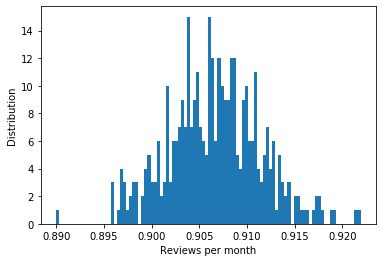

95% confidence interval lower limit : [0.89721567 0.91679337]


In [21]:
np.random.seed(47)
N_rep = 365
mean_replicate = np.empty(N_rep)

for i in range(N_rep):
    """Generate bootstrap sample: bs_sample """
    bs_sample = np.random.choice(df1["reviews_per_month_new"],len(df1["reviews_per_month_new"]))
    mean_replicate[i] = np.mean(bs_sample)

#Calculate the mean and Std of bootstarp.
mean = np.mean(mean_replicate)
std = np.std(mean_replicate)
print("mean:",mean)

# plot for visualization
plt.hist(mean_replicate, bins = 100)
plt.xlabel('Reviews per month')
plt.ylabel('Distribution')
plt.show()

# Calculate 95% confidence interval at lower limit.
#the standard deviation of a sampling distribution is its standard error
Lowerlimit= np.percentile(mean_replicate,[2.5,97.5])
print("95% confidence interval lower limit :",Lowerlimit)

In [22]:
N_rep = 365
mean_diff = np.empty(N_rep)
sample_M= df1[df1["neighbourhood_group"]=="Manhattan"]["number_of_reviews_new"]
sample_B= df1[df1["neighbourhood_group"]=="Brooklyn"]["number_of_reviews_new"]

for i in range(N_rep):
    bs_sample = np.random.permutation(df1.number_of_reviews_new)
    bs_mean_i = np.mean(bs_sample[:len(sample_M)])
    bs_mean_n = np.mean(bs_sample[len(sample_M):])
    mean_diff[i] = bs_mean_i - bs_mean_n

# Calculate the mean difference between the insured and uninsured
mean_diff_observed = np.mean(sample_M) - np.mean(sample_B)

In [23]:
p_val_permutation = np.sum(mean_diff >= mean_diff_observed)/len(mean_diff)
print(p_val_permutation)

1.0


Now we can conclude that p_value lies more than the significance level 0.05. Therefore we can accept the Null hypothesis i.e Manhattan & Brooklyn reviews per month are significantly similar.